In [1]:
import os
import glob
import numpy as np
import pandas as pd
import seaborn as sns
from nltools.mask import create_sphere, expand_mask
from nltools.data import Brain_Data, Adjacency
from nltools.stats import align
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from nilearn.plotting import plot_stat_map
import datalad.api as dl
import warnings
import nibabel as nib
warnings.simplefilter('ignore')

In [2]:
data_dir = '/data/rainville/Hypnosis_ISC/4D_data'
ana_files = glob.glob(os.path.join(data_dir, 'sub*', '*analgesia*.nii.gz'))
subjects = [os.path.basename(os.path.dirname(path)) for path in ana_files]


In [35]:
ana_files

['/data/rainville/Hypnosis_ISC/4D_data/sub-09/sub-09_analgesia_run-01_bold_4D.nii.gz',
 '/data/rainville/Hypnosis_ISC/4D_data/sub-03/sub-03_analgesia_run-01_bold_4D.nii.gz',
 '/data/rainville/Hypnosis_ISC/4D_data/sub-22/sub-22_analgesia_run-02_bold_4D.nii.gz',
 '/data/rainville/Hypnosis_ISC/4D_data/sub-28/sub-28_analgesia_run-01_bold_4D.nii.gz',
 '/data/rainville/Hypnosis_ISC/4D_data/sub-17/sub-17_analgesia_run-02_bold_4D.nii.gz',
 '/data/rainville/Hypnosis_ISC/4D_data/sub-41/sub-41_analgesia_run-02_bold_4D.nii.gz',
 '/data/rainville/Hypnosis_ISC/4D_data/sub-36/sub-36_analgesia_run-01_bold_4D.nii.gz',
 '/data/rainville/Hypnosis_ISC/4D_data/sub-38/sub-38_analgesia_run-01_bold_4D.nii.gz',
 '/data/rainville/Hypnosis_ISC/4D_data/sub-26/sub-26_analgesia_run-01_bold_4D.nii.gz',
 '/data/rainville/Hypnosis_ISC/4D_data/sub-42/sub-42_analgesia_run-02_bold_4D.nii.gz',
 '/data/rainville/Hypnosis_ISC/4D_data/sub-07/sub-07_analgesia_run-01_bold_4D.nii.gz',
 '/data/rainville/Hypnosis_ISC/4D_data/sub-

Load data

**Probabilistic atlas**

In [4]:
atlas_path = '/data/rainville/dSutterlin/projects/isc_suggestions/DiFuMo256/3mm/maps.nii.gz'
atlas_dict_path = '/data/rainville/dSutterlin/projects/isc_suggestions/DiFuMo256/labels_256_dictionary.csv'
atlas = nib.load(atlas_path)
atlas_df = pd.read_csv(atlas_dict_path)
print('atlas loaded with N ROI : ', atlas.shape)

atlas loaded with N ROI :  (104, 123, 104, 256)


In [6]:
mask

nltools.data.brain_data.Brain_Data(data=(238955,), Y=(0, 0), X=(0, 0), mask=MNI152_T1_2mm_brain_mask.nii.gz)

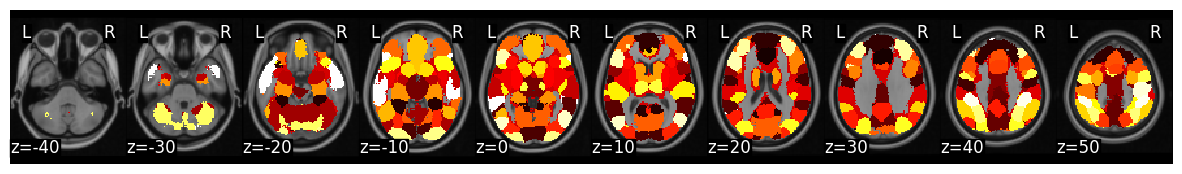

In [5]:
mask = Brain_Data('https://neurovault.org/media/images/8423/k50_2mm.nii.gz')
mask_x = expand_mask(mask)
mask.plot()

In [35]:
mask_nifti = mask_x.to_nifti()
print(mask_x.shape, mask_nifti.shape)

<bound method Brain_Data.shape of nltools.data.brain_data.Brain_Data(data=(50, 238955), Y=(0, 0), X=(0, 0), mask=MNI152_T1_2mm_brain_mask.nii.gz)> (91, 109, 91, 50)


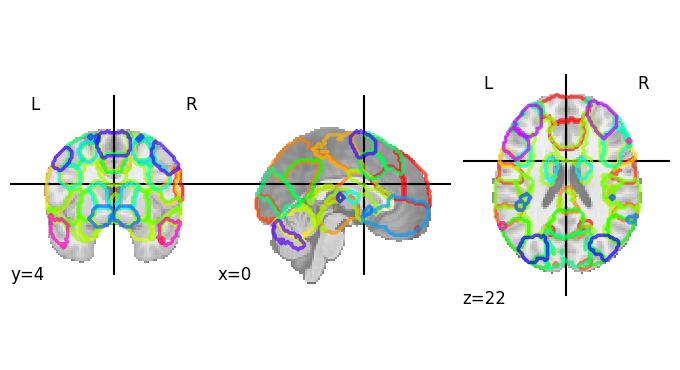

In [34]:
from nilearn.plotting import plot_prob_atlas

mask_nifti = mask_x.to_nifti()
view = plot_prob_atlas(mask_nifti, threshold=None)  # Use threshold=None to display the whole mask
view

**Extract data in ROI**

In [8]:
#func_ana = Brain_Data(ana_files)
n_subj = 6; # limit computation time

roi = 4
roi_mask = mask_x[roi]

#file_list = glob.glob(os.path.join(data_dir, 'fmriprep', '*', 'func', f'*crop*{scan}*nii.gz'))
ana_data = []
for count, (sub, f) in enumerate(zip(subjects, ana_files)):
    if count > n_subj:
        break
    else:    
        print(sub)
        data = Brain_Data(f)
        ana_data.append(data.apply_mask(roi_mask))

sub-09
sub-03
sub-22
sub-28
sub-17
sub-41
sub-36


**Hyper align**

In [11]:
ana_data

[nltools.data.brain_data.Brain_Data(data=(372, 2786), Y=(0, 0), X=(0, 0), mask=MNI152_T1_2mm_brain_mask.nii.gz),
 nltools.data.brain_data.Brain_Data(data=(372, 2786), Y=(0, 0), X=(0, 0), mask=MNI152_T1_2mm_brain_mask.nii.gz),
 nltools.data.brain_data.Brain_Data(data=(372, 2786), Y=(0, 0), X=(0, 0), mask=MNI152_T1_2mm_brain_mask.nii.gz),
 nltools.data.brain_data.Brain_Data(data=(377, 2786), Y=(0, 0), X=(0, 0), mask=MNI152_T1_2mm_brain_mask.nii.gz),
 nltools.data.brain_data.Brain_Data(data=(377, 2786), Y=(0, 0), X=(0, 0), mask=MNI152_T1_2mm_brain_mask.nii.gz),
 nltools.data.brain_data.Brain_Data(data=(377, 2786), Y=(0, 0), X=(0, 0), mask=MNI152_T1_2mm_brain_mask.nii.gz),
 nltools.data.brain_data.Brain_Data(data=(377, 2786), Y=(0, 0), X=(0, 0), mask=MNI152_T1_2mm_brain_mask.nii.gz)]

In [12]:
hyperalign = align(ana_data[:6], method='procrustes')

In [34]:
hyperalign

{'transformed': [nltools.data.brain_data.Brain_Data(data=(377, 2786), Y=(0, 0), X=(0, 0), mask=MNI152_T1_2mm_brain_mask.nii.gz),
  nltools.data.brain_data.Brain_Data(data=(377, 2786), Y=(0, 0), X=(0, 0), mask=MNI152_T1_2mm_brain_mask.nii.gz),
  nltools.data.brain_data.Brain_Data(data=(377, 2786), Y=(0, 0), X=(0, 0), mask=MNI152_T1_2mm_brain_mask.nii.gz),
  nltools.data.brain_data.Brain_Data(data=(377, 2786), Y=(0, 0), X=(0, 0), mask=MNI152_T1_2mm_brain_mask.nii.gz),
  nltools.data.brain_data.Brain_Data(data=(377, 2786), Y=(0, 0), X=(0, 0), mask=MNI152_T1_2mm_brain_mask.nii.gz),
  nltools.data.brain_data.Brain_Data(data=(377, 2786), Y=(0, 0), X=(0, 0), mask=MNI152_T1_2mm_brain_mask.nii.gz)],
 'common_model': nltools.data.brain_data.Brain_Data(data=(377, 2786), Y=(0, 0), X=(0, 0), mask=MNI152_T1_2mm_brain_mask.nii.gz),
 'transformation_matrix': [nltools.data.brain_data.Brain_Data(data=(2786, 2786), Y=(0, 0), X=(0, 0), mask=MNI152_T1_2mm_brain_mask.nii.gz),
  nltools.data.brain_data.Brain

Text(0.5, 1.0, 'Aligned Voxel ISC: r=0.3')

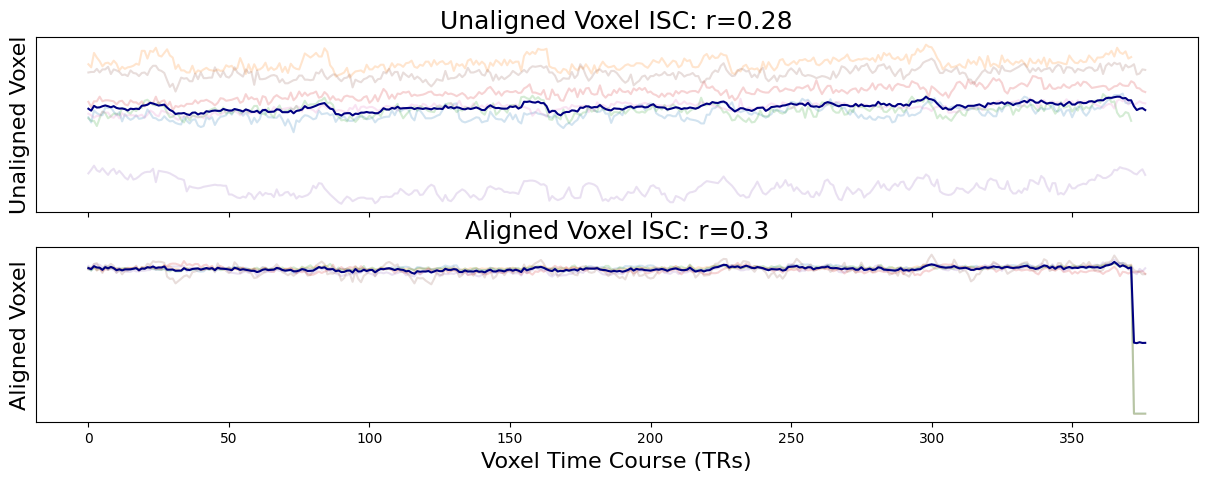

In [17]:
voxel_index = 50

voxel_unaligned = pd.DataFrame([x.data[:, voxel_index] for x in ana_data]).T # x is subject i
voxel_aligned = pd.DataFrame([x.data[:, voxel_index] for x in hyperalign['transformed']]).T

f, a = plt.subplots(nrows=2, figsize=(15, 5), sharex=True)
a[0].plot(voxel_unaligned, linestyle='-', alpha=.2)
a[0].plot(np.mean(voxel_unaligned, axis=1), linestyle='-', color='navy')
a[0].set_ylabel('Unaligned Voxel', fontsize=16)
a[0].yaxis.set_ticks([])

a[1].plot(voxel_aligned, linestyle='-', alpha=.2)
a[1].plot(np.mean(voxel_aligned, axis=1), linestyle='-', color='navy')
a[1].set_ylabel('Aligned Voxel', fontsize=16)
a[1].yaxis.set_ticks([])

plt.xlabel('Voxel Time Course (TRs)', fontsize=16)
a[0].set_title(f"Unaligned Voxel ISC: r={Adjacency(voxel_unaligned.corr(), matrix_type='similarity').mean():.02}", fontsize=18)
a[1].set_title(f"Aligned Voxel ISC: r={Adjacency(voxel_aligned.corr(), matrix_type='similarity').mean():.02}", fontsize=18)


**ISC distribution : N voxel pair-wise correlation, meaned**

Unaligned voxel ISC

In [22]:
ana_data[0].data.flatten().shape

(1036392,)

In [23]:
ana_data[0].data.shape[1]

2786

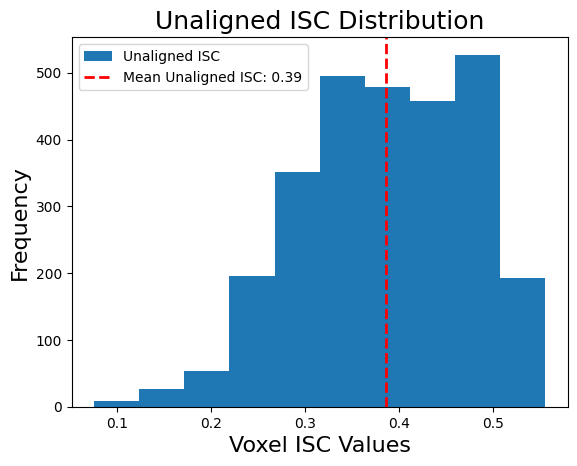

Mean Unaligned ISC (voxel-wise): 0.39


In [30]:
import numpy as np
from nltools.data import Adjacency

unaligned_isc = {}

#compute mean ISC for each unaligned voxel to plot distribution
for voxel_index in range(ana_data[0].data.shape[1]):  # Assuming all_data is a list of Brain_Data objects
    # Extract the time series for this voxel across all subjects
    voxel_time_series = np.array([x.data[:372, voxel_index] for x in ana_data])  # shape (n_subjects, n_timepoints)
    voxel_corr = np.corrcoef(voxel_time_series)  # matrix shape (n_subjects, n_subjects)
    triu_indices = np.triu_indices_from(voxel_corr, k=1) # mean of triangle
    unaligned_isc[voxel_index] = voxel_corr[triu_indices].mean()

plt.hist(unaligned_isc.values(),label='Unaligned ISC')
plt.axvline(x=np.mean(list(unaligned_isc.values())), linestyle='--', color='red', linewidth=2, label=f'Mean Unaligned ISC: {np.mean(list(unaligned_isc.values())):.2f}')
plt.ylabel('Frequency', fontsize=16)
plt.xlabel('Voxel ISC Values', fontsize=16)
plt.title('Unaligned ISC Distribution', fontsize=18)
plt.legend()
plt.show()

# Print the mean ISC value for unaligned data
print(f"Mean Unaligned ISC (voxel-wise): {np.mean(list(unaligned_isc.values())):.2f}")


Mean ISC: 0.33


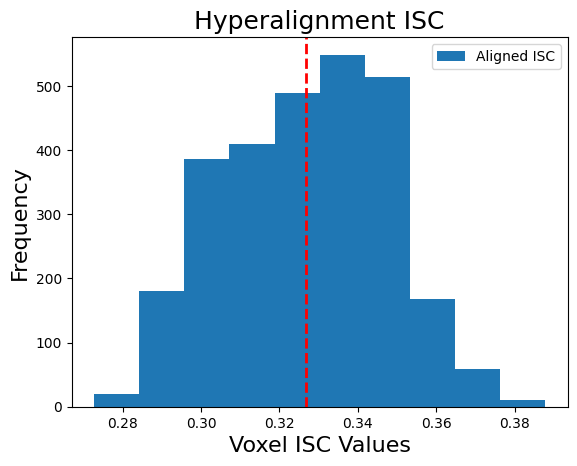

In [32]:
plt.hist(hyperalign['isc'].values(), label='Aligned ISC')
plt.axvline(x=np.mean(list(hyperalign['isc'].values())), linestyle='--', color='red', linewidth=2)
plt.ylabel('Frequency', fontsize=16)
plt.xlabel('Voxel ISC Values', fontsize=16)
plt.legend()
plt.title('Hyperalignment ISC', fontsize=18)

print(f"Mean ISC: {np.mean(list(hyperalign['isc'].values())):.2}")

**Compare a slice of ROI**

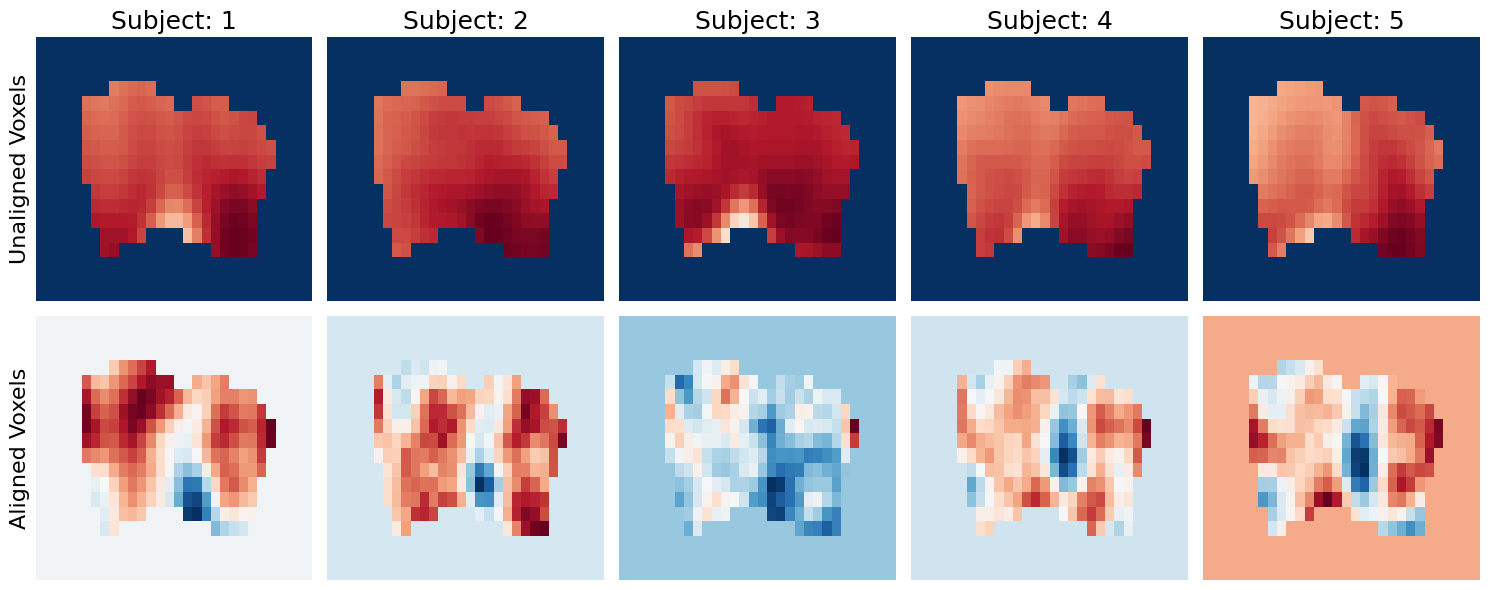

In [33]:
tr_index = 100

f,a = plt.subplots(ncols=5, nrows=2, figsize=(15,6), sharex=True, sharey=True)
for i in range(5):
    sns.heatmap(np.rot90(ana_data[i][tr_index].to_nifti().dataobj[30:60, 10:28, 37]), cbar=False, cmap='RdBu_r', ax=a[0,i])
    a[0,i].set_title(f'Subject: {i+1}', fontsize=18)
    a[0,i].axes.get_xaxis().set_visible(False)
    a[0,i].yaxis.set_ticks([])
    sns.heatmap(np.rot90(hyperalign['transformed'][i][tr_index].to_nifti().dataobj[30:60, 10:28, 37]), cbar=False, cmap='RdBu_r', ax=a[1,i])
    a[1,i].axes.get_xaxis().set_visible(False)
    a[1,i].yaxis.set_ticks([])

a[0,0].set_ylabel('Unaligned Voxels', fontsize=16)
a[1,0].set_ylabel('Aligned Voxels', fontsize=16)

plt.tight_layout()

In [ ]:
data_dir = '/data/rainville/Hypnosis_ISC/4D_data/segmented'